In [1]:
%load_ext autoreload

import time

import struct
import array
import gc

import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append("../mim_data_utils/src")
from mim_data_utils import DataLogger, DataReader

np.set_printoptions(suppress=True, precision=2)

In [2]:
from scipy.spatial.transform import Rotation

In [3]:
# reader = DataReader('2021-06-30_17-13-43.mds')
reader = DataReader('good data/2021-06-30_17-11-17.mds')

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


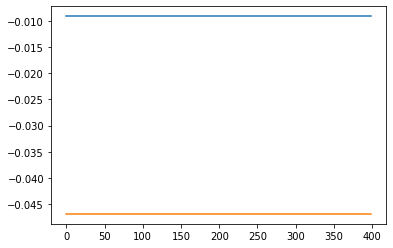

In [4]:
plt.plot(reader.data['zero_pos'][:,4:6])

Text(0.5, 1.0, 'invert/flip')

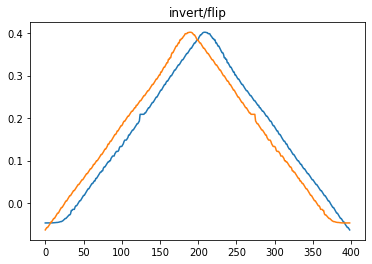

In [5]:
plt.plot(reader.data['joint_positions'][:,5])
plt.plot(reader.data['joint_positions'][::-1,5])
plt.title('invert/flip')

In [6]:
# account for initial/zero positions and hip/upper leg moving
j = reader.data['joint_positions'][:,4:6] - reader.data['zero_pos'][:,4:6]
j = j[:,1] + j[:,0]
j.shape

(399,)

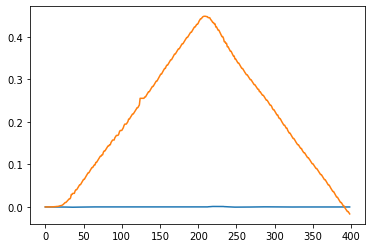

In [7]:
plt.plot(reader.data['joint_positions'][:,4:6] - reader.data['zero_pos'][:,4:6])

Text(0.5, 1.0, 'invert/flip')

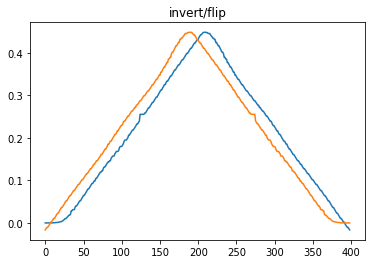

In [8]:
plt.plot(j)
plt.plot(j[::-1])
plt.title('invert/flip')

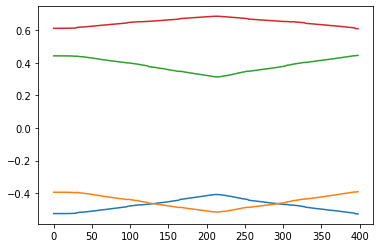

In [9]:
plt.plot(reader.data['vicon_leg_hl'][:,3:7])

In [10]:
# scalar comes last
Rotation.from_quat((0,0,0,1)).as_euler('xyz')

array([0., 0., 0.])

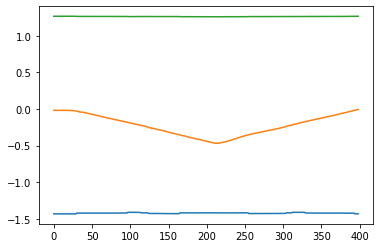

In [11]:
E_all = Rotation.from_quat(reader.data['vicon_leg_hl'][:,3:7]).as_euler('xyz')
plt.plot(E_all)

Text(0.5, 1.0, 'invert/flip')

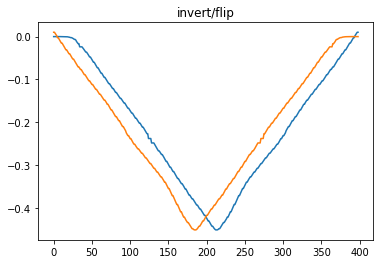

In [12]:
E = Rotation.from_quat(reader.data['vicon_leg_hl'][:,3:7]).as_euler('xyz')[:,1]
E -= E[0]
plt.plot(E)
plt.plot(E[::-1])
plt.title('invert/flip')

Text(0.5, 1.0, 'overlay')

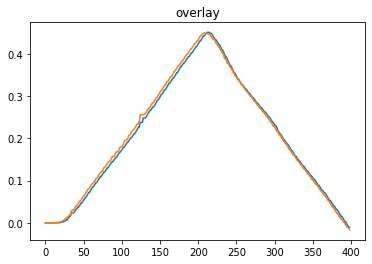

In [13]:
plt.plot(E*-1)
plt.plot(j)
plt.title('overlay')

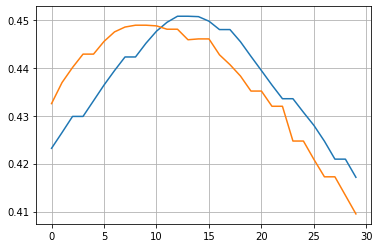

In [14]:
s = slice(200,230)
plt.plot(E[s]*-1)
plt.plot(j[s])
plt.grid()

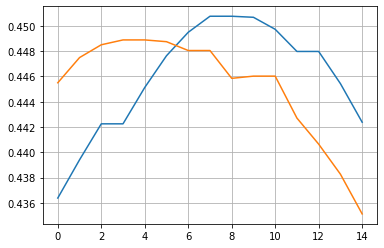

In [15]:
s = slice(205,220)
plt.plot(E[s]*-1)
plt.plot(j[s])
plt.grid()

In [16]:
D = (j+E)

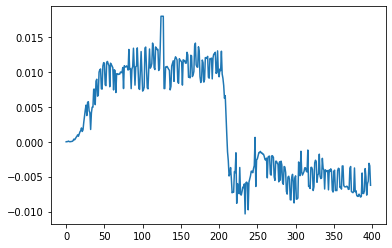

In [17]:
plt.plot(D)

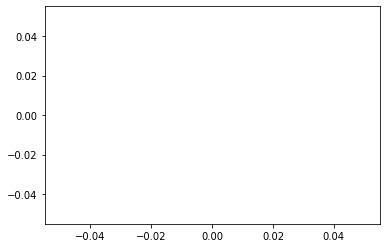

In [18]:
plt.plot(D[1000:1500])

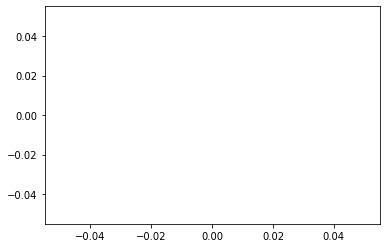

In [19]:
plt.plot(D[2000:2500])

### Quaternions